# LEAD SCORE CASE STUDY





### Problem Statement  

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

### Objective 

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


# Reading and Understanding the Data


#### Importing Libraries


In [1]:
#Imporitng the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Import warnings 

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the csv file using pandas

leads_df = pd.read_csv("Leads.csv")

In [4]:
#Check first few rows

leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Check the shape of dataset

leads_df.shape

#(9240, 37)

(9240, 37)

In [6]:
#Checking info & datatypes 

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#check the details of numeriacl data

leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Check the columns of data

leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
#checking for null values in dataset

count=leads_df.isnull().sum()
print(count)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### There are 9240 rows and 37 columns in the data set.There are null values present in few columns that need to be handled.

# Data Cleaning

In [10]:
# checking duplicates for Prospect ID & Lead Number columns

sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

sum(leads_df.duplicated(subset = 'Lead Number')) == 0

# No duplicates present in Prospect ID & Lead Number column

True

In [11]:
#From the given data we can see that Prospect ID & Lead Number columns seems to have unique values so we can drop them as they are just a row identifier 
# ( indicative of the ID number of the Contacted People)


leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
#Converting 'Select' values to NaN.

leads_df = leads_df.replace('Select', np.nan)

In [13]:
#checking null values in each rows

leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
# dropping cols with more than 40% missing values

cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 40):
        leads_df.drop(i, 1, inplace = True)

In [16]:
#lets again check null values percentage


round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Still we are left with 6 columns that have high % of null values, lets check these columns one by one & see what we can do to impute missing values.

City - 39.71,
Specialization - 36.58,
Tags - 36.29,
What matters most to you in choosing a course - 29.32,
What is your current occupation - 29.11,
Country - 26.63

In [17]:
# City - The city of the customer

leads_df['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### As we can observe maximum of the values in city column are either missing or Mumbai, so we have 2 options - either we can impute missing values as Mumbai or just drop this city column

But imputing missing values with Mumbai doesn't add much as a result 80% of values will become Mumbai only, so its better to drop this column as it will not add much to our analysis

In [18]:
# Dropping the City column

leads_df.drop('City',1, inplace = True)

In [19]:
# Specialization - The industry domain in which the customer worked before or have specialization in.


leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
# we can replace missing values with 'Not known' as its not fair to impute with any other maximum occuring value because we are not sure who the customer is.

leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not known')

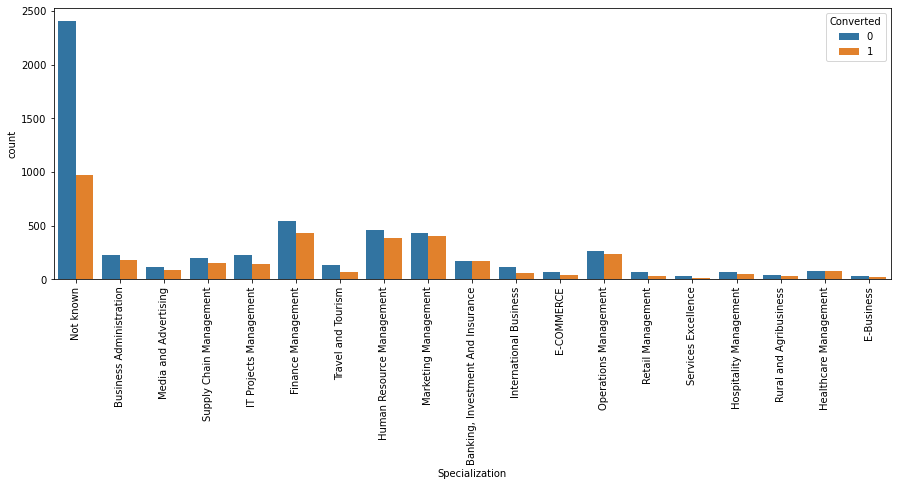

In [21]:
#plotting the spread of Specialization columnn 

plt.figure(figsize=(15,5))

s1=sns.countplot(leads_df.Specialization, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### we can observe that Finance Management specialization have max. number of leads & also the leads conversion among all the speacilization.

In [22]:
# Tags - Tags assigned to customers indicating the current status of the lead.

leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [23]:
#replacing Nan values with "Not known"

leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Not known')

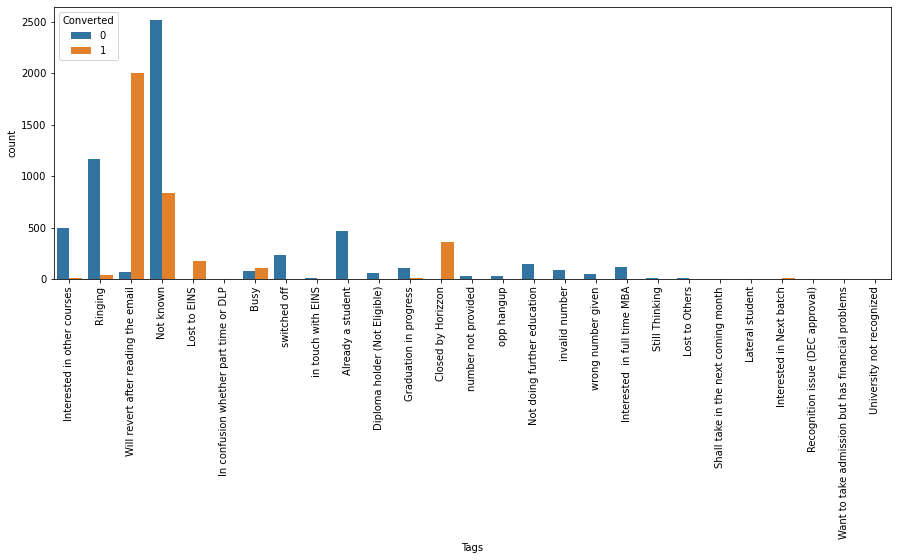

In [24]:
#visualizing the tags column

plt.figure(figsize=(15,5))

s1=sns.countplot(leads_df['Tags'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### As we can observe that many values have very low value count, so its better to group all of them into one category.

In [25]:
# Grouping values with low count 

leads_df['Tags'] = leads_df['Tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 
                                      'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other Tags')

In [26]:
# What matters most to you in choosing a course - An option selected by the customer indicating what is their main motto behind doing this course.

leads_df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
# dropping the 'What matters most to you in choosing a course' column as it has either null value or most of the values are -Better Career Prospects 

leads_df.drop('What matters most to you in choosing a course',1, inplace = True)

In [28]:
#  What is your current occupation - Indicates whether the customer is a student, umemployed or employed.

leads_df['What is your current occupation'].value_counts(dropna = False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#replacing Nan values with "Not known"

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan,'Not known')

In [30]:
# Country - The country of the customer.

leads_df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [31]:
# lets drop the Country column as more than 90% values are India or NA(not known)


leads_df.drop('Country',1, inplace = True)

In [32]:
# lets check the missing value % again

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

#### As we can observe maximum of missing values are handled. Only 4 columns shows very neglegible % of missing values i.e. less than 2 % , so we can drop these rows as it will not affect our analysis.

In [33]:
# dropping the rows with null values

leads_df = leads_df.dropna()

In [34]:
# lets check the missing value % again

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

#### All misssing data is handled. 

# EDA 

In [35]:
#check for datatypes

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  What is your current occupation     

# Univariate Analysis


## Categorical Variables


In [36]:
# creating function to plot categorical variables against converted(leads)


def cat_var(c):
    plt.figure(figsize=(20, 10))
    ax = sns.countplot(x = c, hue = leads_df.Converted,palette='dark', data=leads_df)
    

    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
    plt.xticks(rotation = 90)
    plt.show()

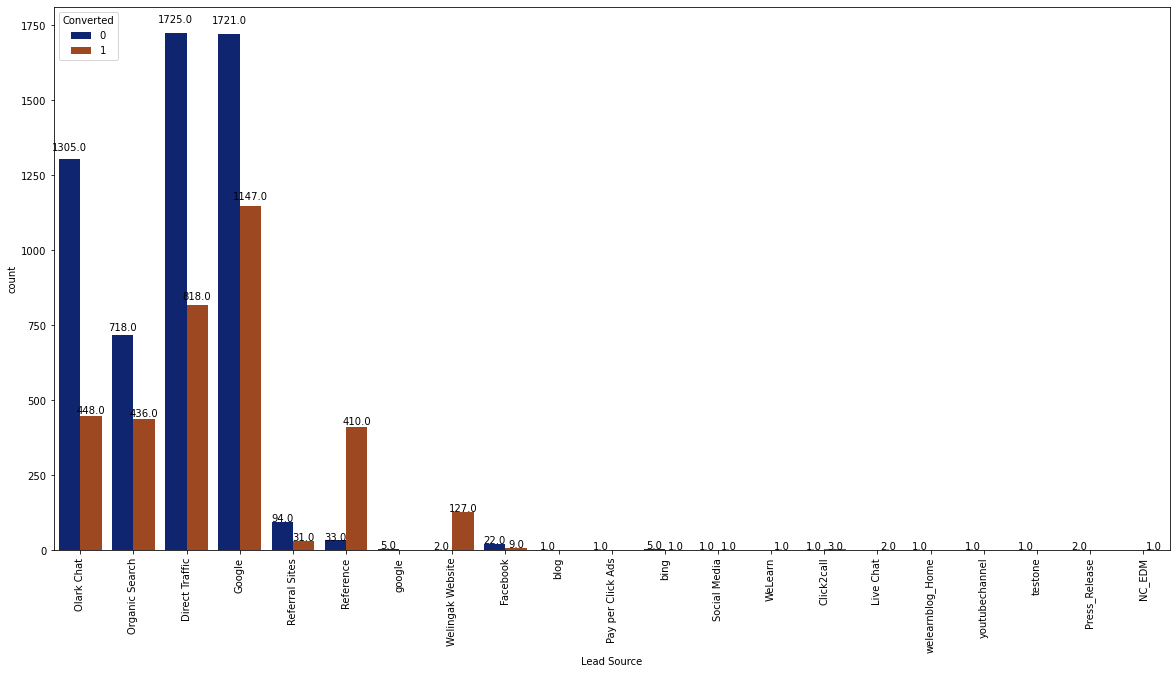

In [37]:
cat_var('Lead Source')


In [38]:
# Lead Source 
leads_df['Lead Source'].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [39]:
# lets group the values with low count 

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Referral Sites', 'Facebook', 'bing', 'google', 'Click2call',
                                                     'Live Chat', 'Social Media', 'Press_Release', 'testone',
                                                     'Pay per Click Ads', 'WeLearn', 'blog', 'welearnblog_Home',
                                                     'NC_EDM', 'youtubechannel'], 'Others')

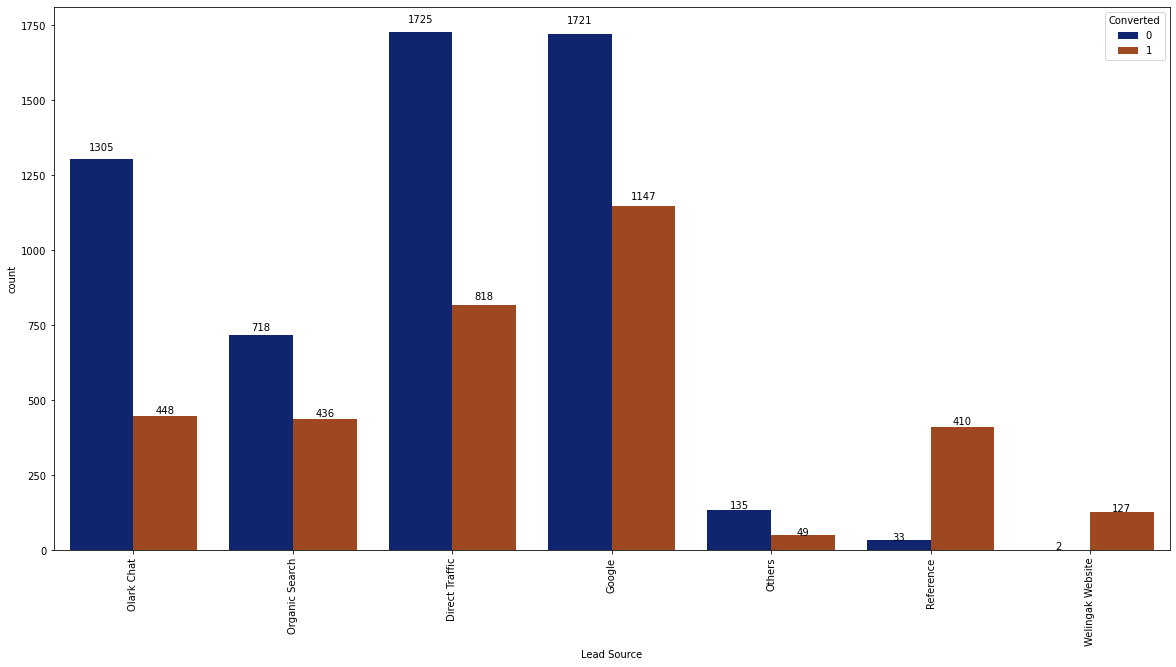

In [40]:
# lets plot again 

cat_var('Lead Source')

#### Inference:

- Source of Lead via Google and Direct Traffic have higher number of leads coming but have  poor conversion as compared to others.
- Leads coming via Reference - have the highest conversion rate.

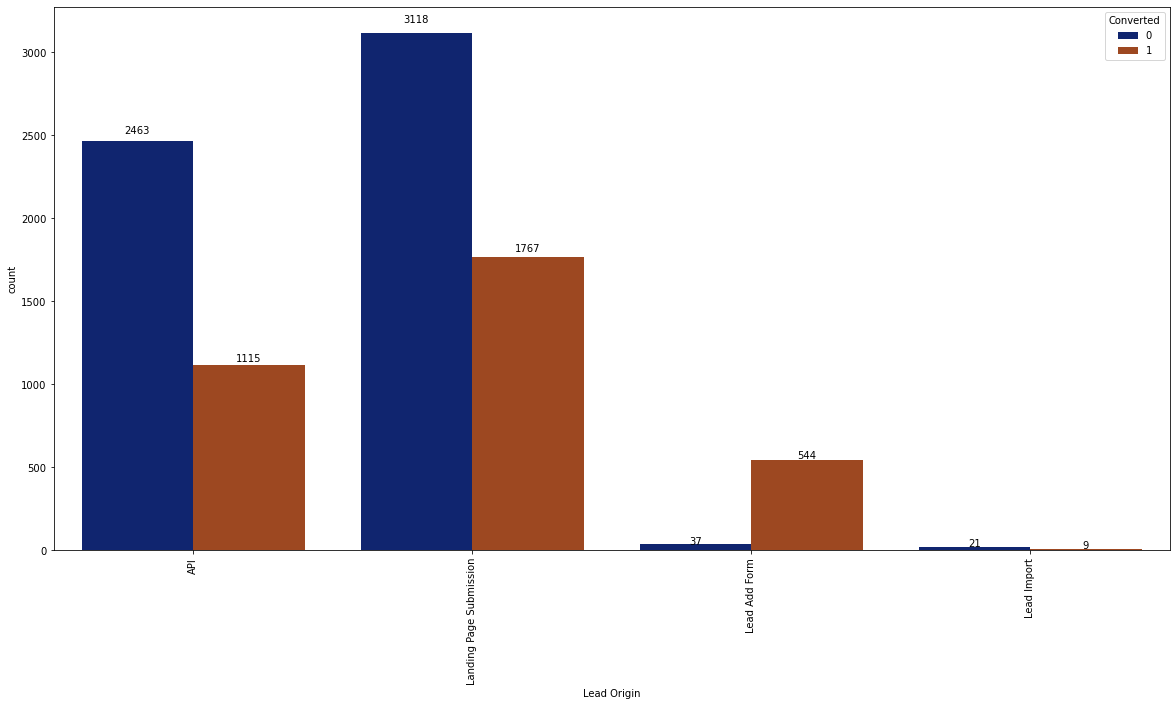

In [41]:
# lead origin

cat_var('Lead Origin')

#### Inference:

- Origin of Lead via 'Landing Page Submission' have higher number of leads coming but have  poor conversion.
- Leads coming via 'Lead Add Form' - have the highest conversion rate.

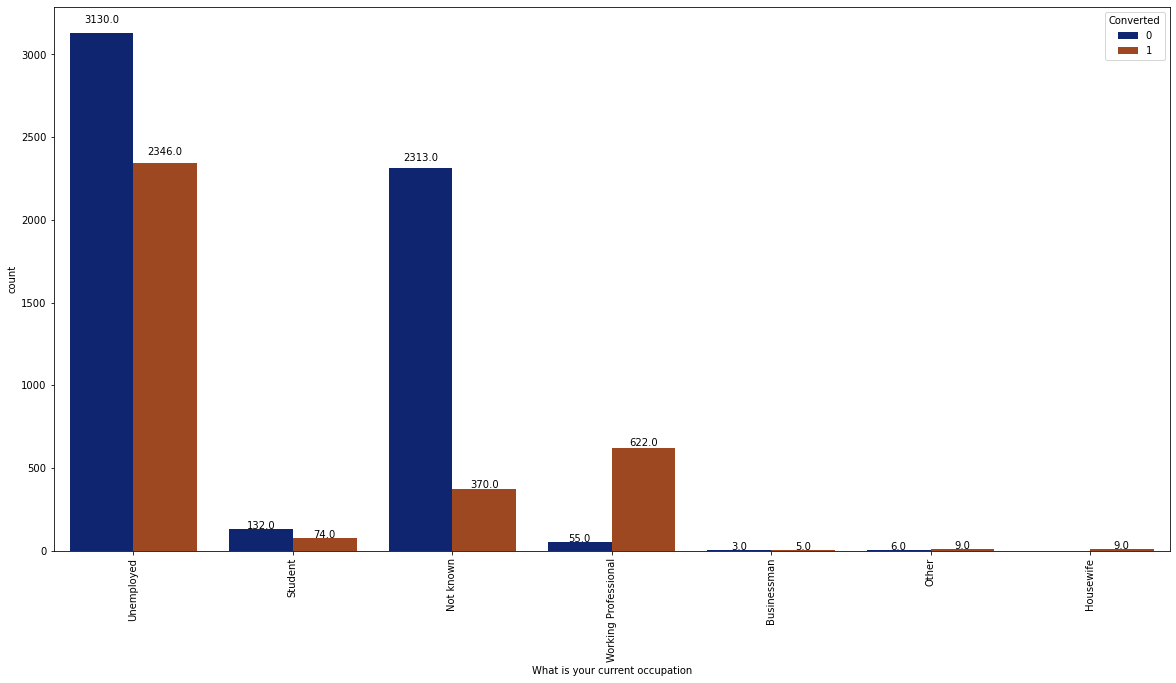

In [42]:
# What is your current occupation

cat_var('What is your current occupation')

#### Inference:

- Leads coming from  'Unemployed' category have higher number of leads coming but have  poor conversion(~42%).
- Leads coming from 'Working Professional' - have the highest conversion rate(~92%).

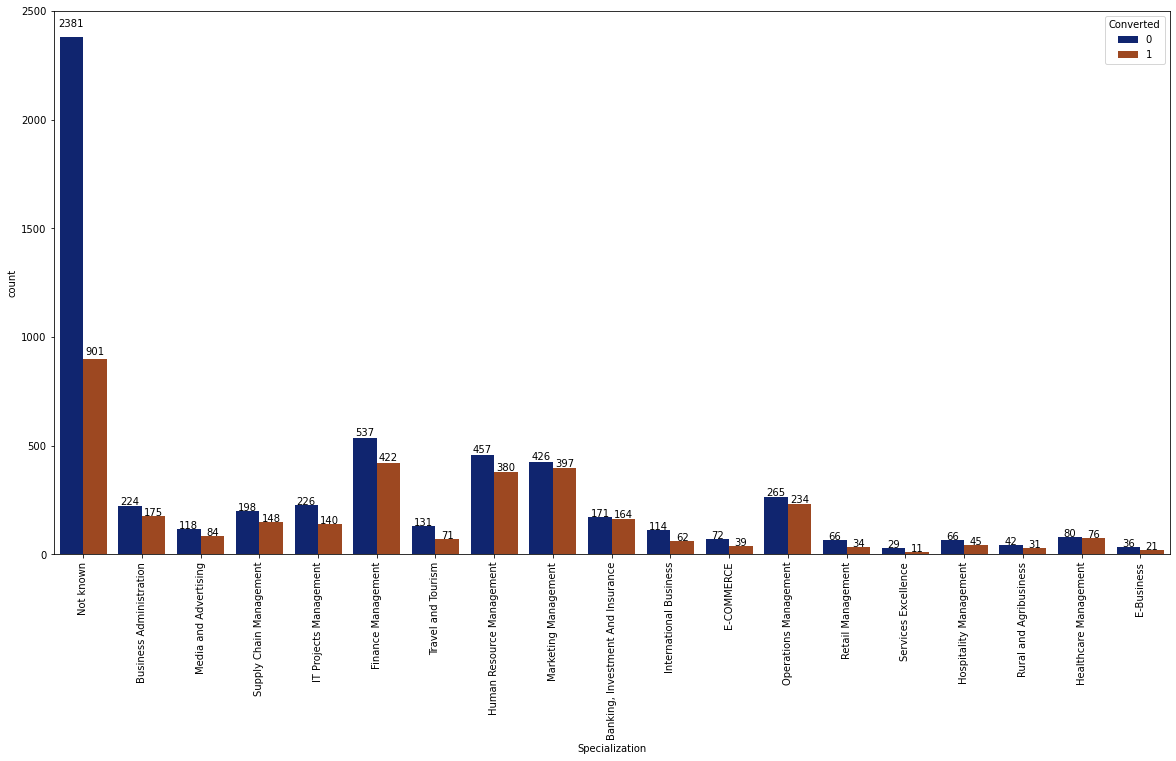

In [43]:
# Specialization

cat_var('Specialization')

#### Inference : 

- Leads coming from customer having specialization in management field have good conversion rate.
- Most of the customer's specialization is not known.

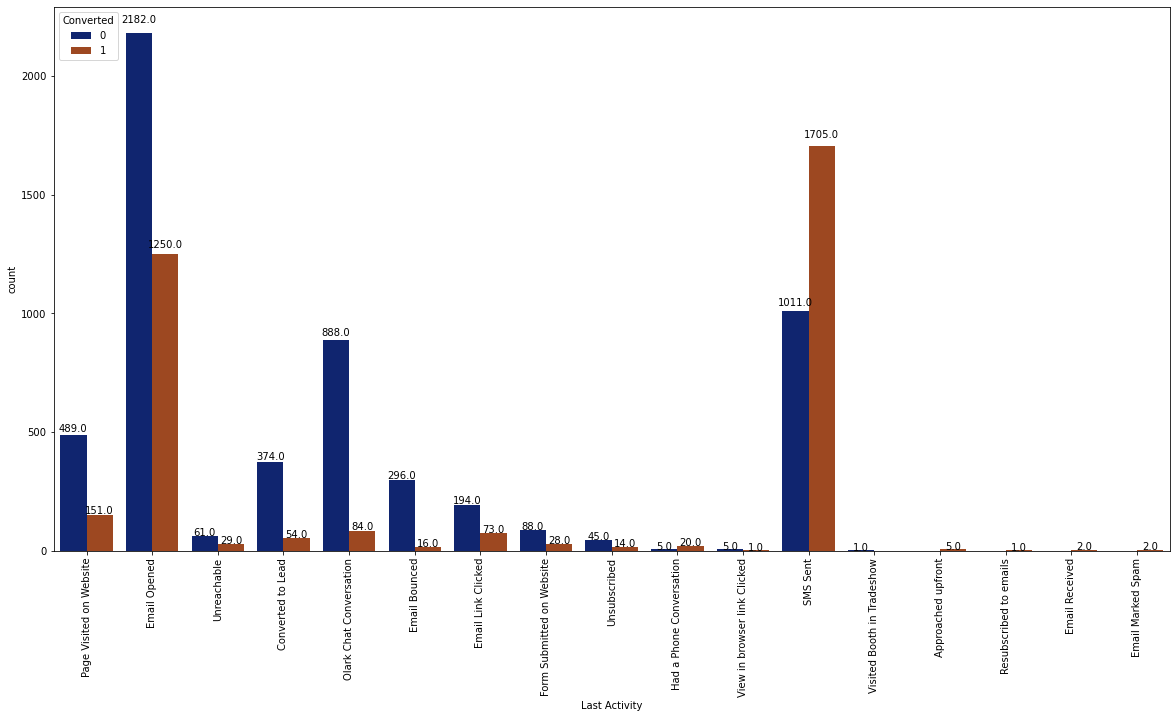

In [46]:
# Last Activity

cat_var('Last Activity')

In [47]:
# lets group the values with low count

leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
                                                        'View in browser link Clicked', 'Approached upfront',
                                                        'Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Received', 'Email Marked Spam',
                                                        'Form Submitted on Website'], 'Other Methods')

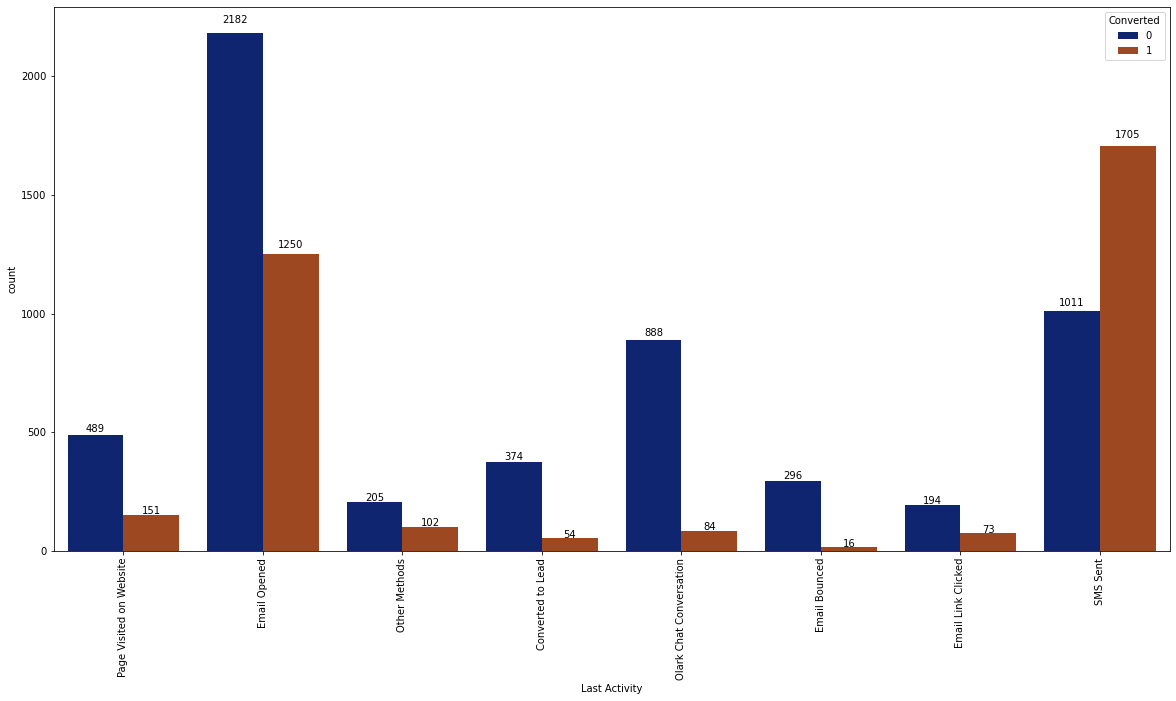

In [48]:
cat_var('Last Activity')

#### Inference:

- Last activity performed by the customer as 'SMS Sent' have the higher conversion rate (~63%). 


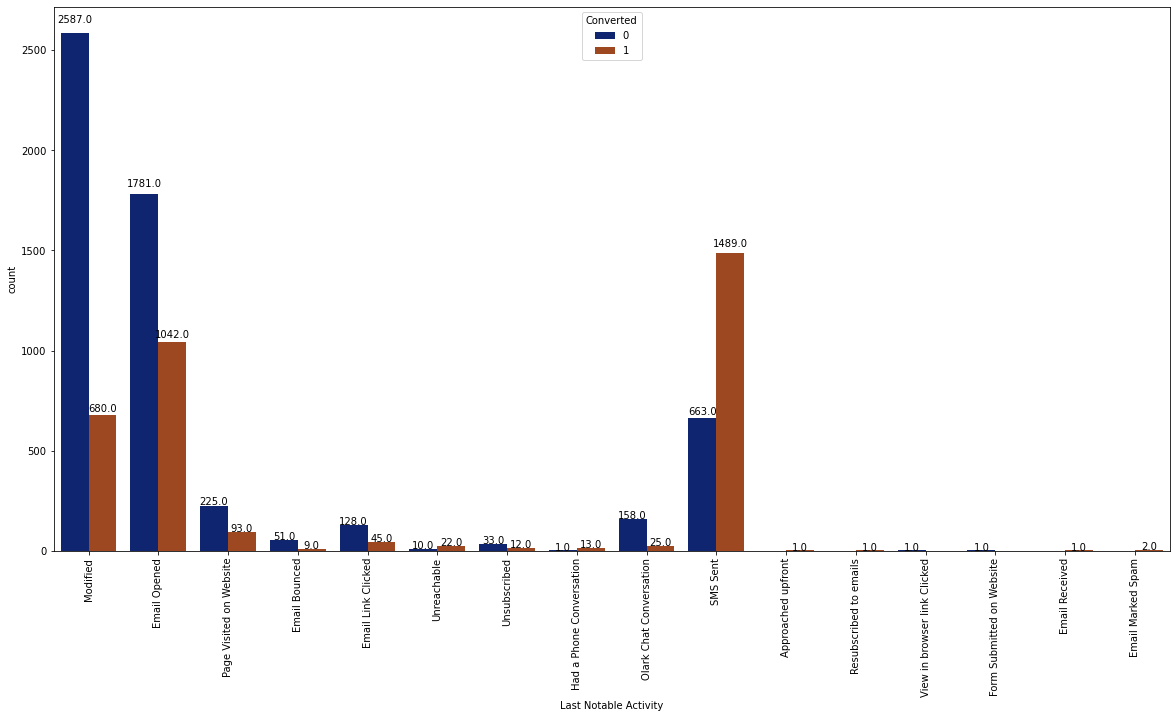

In [50]:
# Last Notable Activity

cat_var('Last Notable Activity')

In [51]:
# lets group the values with low count

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Email Bounced', 'Email Link Clicked',
                                                                         'Unreachable', 'Had a Phone Conversation',
                                                                        'Olark Chat Conversation', 'Approached upfront',
                                                                        'Resubscribed to emails', 'Unsubscribed',
                                                                         'View in browser link Clicked',
                                                                        'Form Submitted on Website', 'Email Received',
                                                                         'Email Marked Spam'], 'Others')

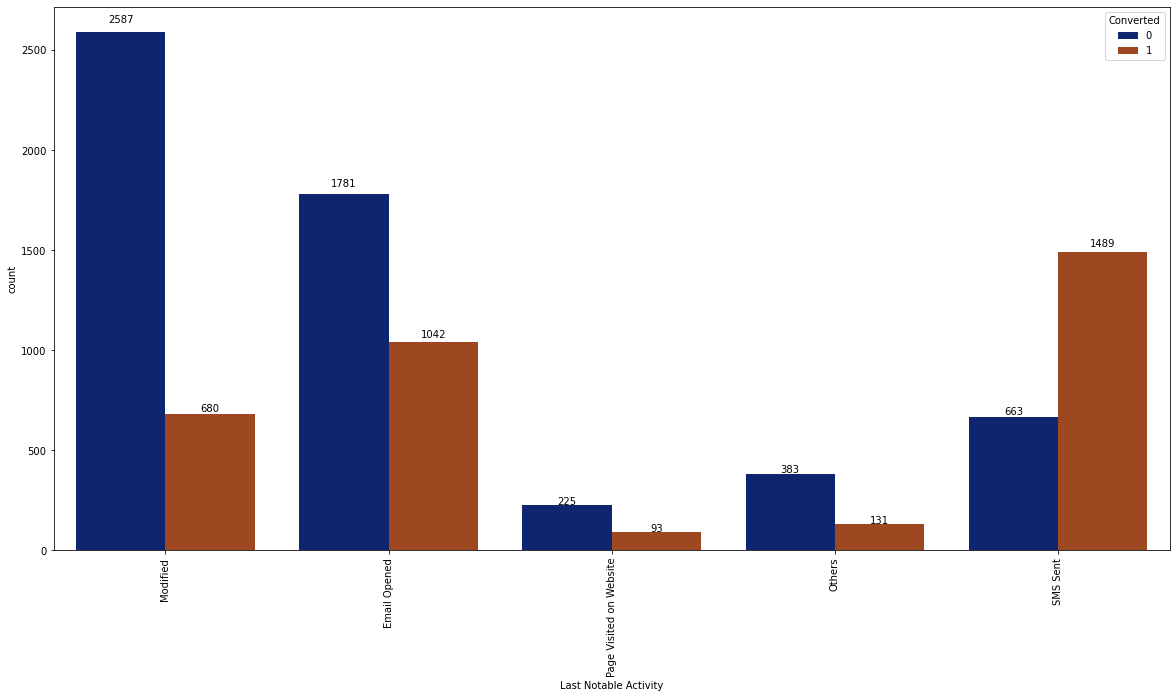

In [52]:
cat_var('Last Notable Activity')

#### Inference:

- The last notable acitivity performed by the student as SMS Sent have the higher conversion rate (~69%).

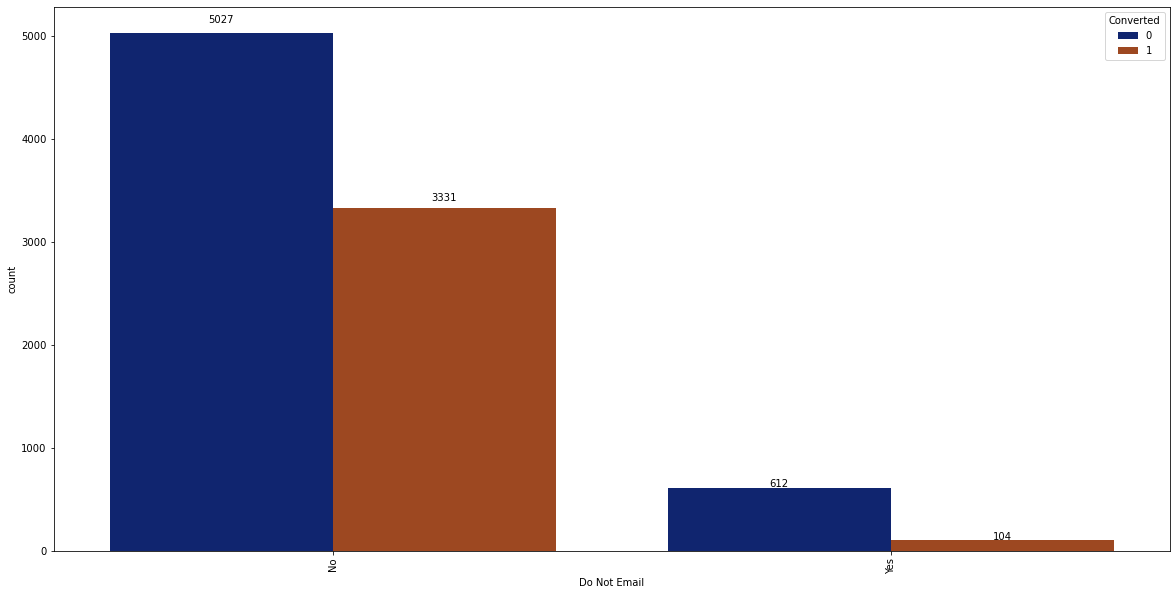

In [53]:
# Do Not Email

cat_var('Do Not Email')

#### Inference :
    
- Its intresting to see that customers who are not willing to be emailed about the course have conversion rate of ~40% where as for the customers who want to be emailed about the same have conversion rate of only ~15%.

Text(0.5, 1.0, 'Do Not Call')

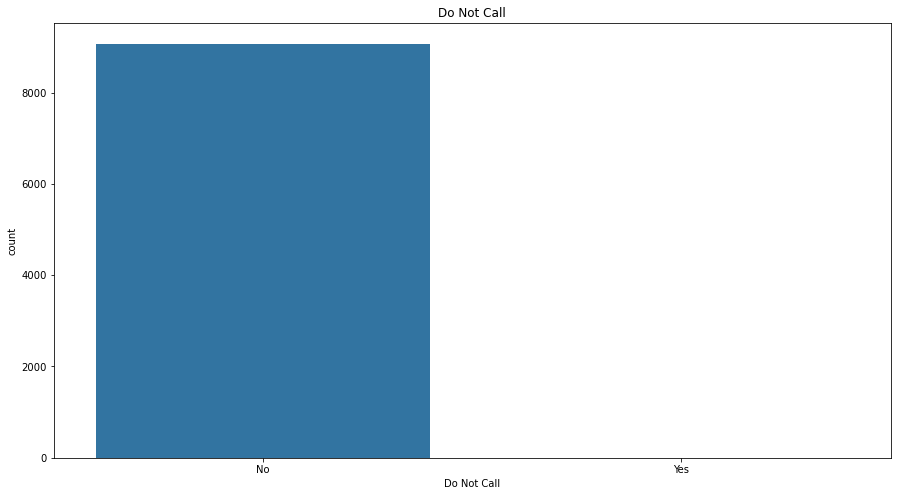

In [54]:
# Do Not Call

plt.figure(figsize=(15, 8))
sns.countplot(leads_df['Do Not Call'])
plt.title('Do Not Call')

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

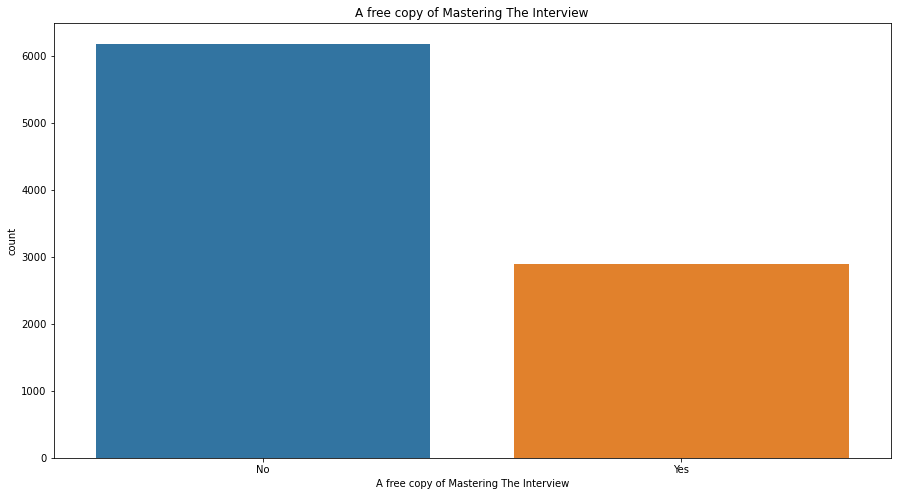

In [55]:
# A free copy of Mastering The Interview

plt.figure(figsize=(15, 8))
ax=sns.countplot(leads_df['A free copy of Mastering The Interview'])

plt.title('A free copy of Mastering The Interview')

In [56]:
# Checking the Percentages of Converted Values

sum(leads_df['Converted'])/len(leads_df['Converted'])*100

37.85541106458012

Text(0.5, 1.0, 'Converted')

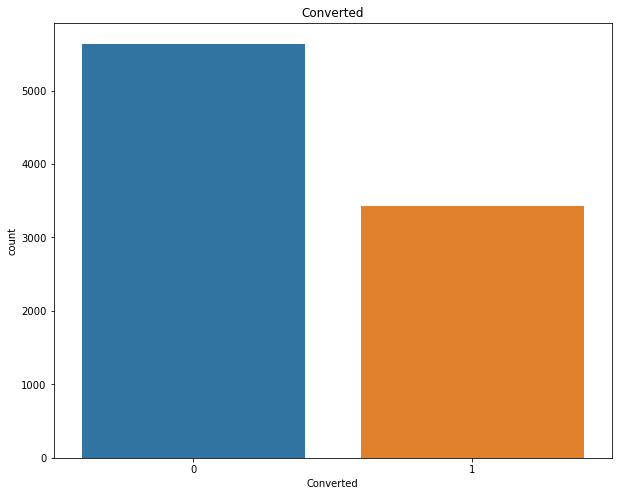

In [57]:
plt.figure(figsize=(10, 8))
sns.countplot(leads_df['Converted'])
plt.title('Converted')

#### Inference :

- Present Lead conversion rate is ~38% . 

# Numerical Variable

In [58]:
# Checking numerial variables

leads_df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


<Figure size 1080x2160 with 0 Axes>

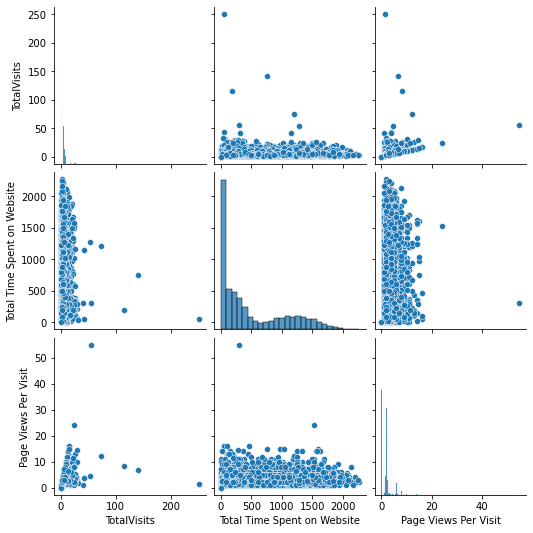

In [59]:
#Draw pairplot to understand numerical variables using seaborn

plt.figure(figsize = (15,30))

sns.pairplot(leads_df, vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()


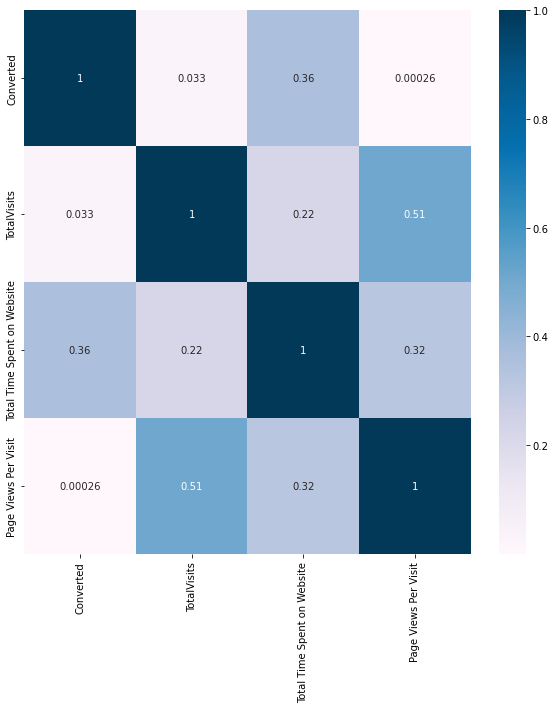

In [60]:
# lets check for Corelation among numerical variables

plt.figure(figsize = (10,10))
sns.heatmap(leads_df.corr(), annot = True, cmap= 'PuBu')
plt.show()

#### Inference :

- There is highest correlation seen between TotalVisits & Page Views Per Visit (0.51)

# Outlier Handling 

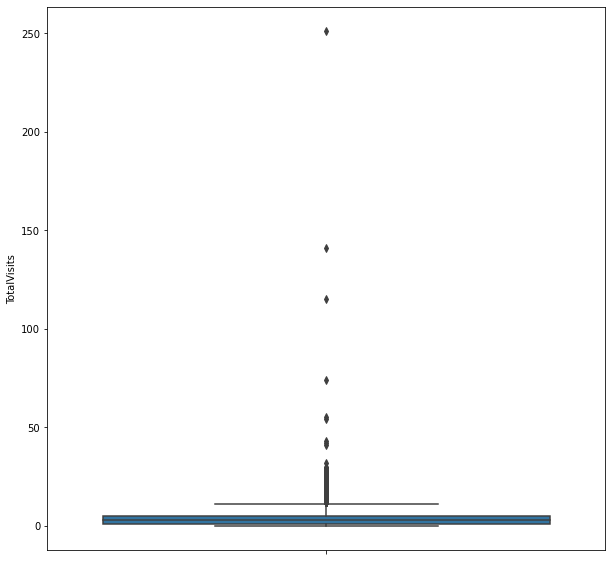

In [61]:
# checking for outliers

# TotalVisits

plt.figure(figsize = (10,10))
sns.boxplot(y= leads_df['TotalVisits'])
plt.show()

In [62]:
# As we can see presence of outliers ,checking percentile values for "Total Visits"

leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

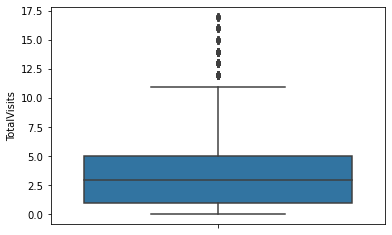

In [63]:
# Handling outliers by removing the top 1%(<99%) of the value

leads_df = leads_df[(leads_df['TotalVisits'] <= leads_df['TotalVisits'].quantile(0.99))]
sns.boxplot(y = leads_df['TotalVisits'])
plt.show()

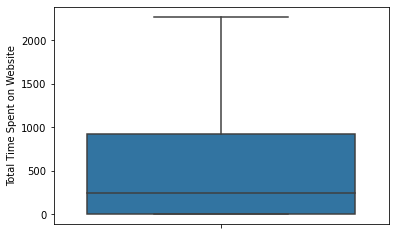

In [64]:
# Total Time Spent on Website

sns.boxplot(y = leads_df['Total Time Spent on Website'])
plt.show()

In [65]:
leads_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
5%          0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

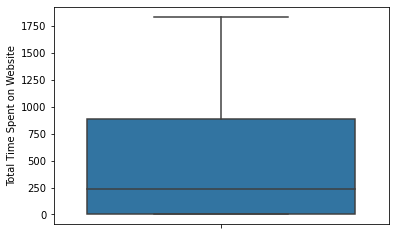

In [66]:
# lets remove the top 1% of the values to handle the outliers

leads_df = leads_df[(leads_df['Total Time Spent on Website'] <= leads_df['Total Time Spent on Website'].quantile(0.99))]
sns.boxplot(y = leads_df['Total Time Spent on Website'])
plt.show()

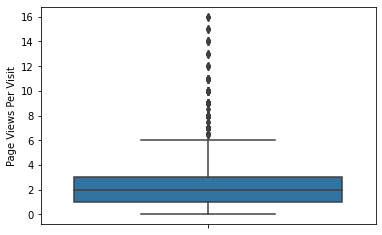

In [67]:
# Page Views Per Visit

sns.boxplot(y = leads_df['Page Views Per Visit'])
plt.show()

In [68]:
leads_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8901.000000
mean        2.336171
std         2.063347
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [69]:
# outliers handled

num = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8901.000000,8901.000000,8901.000000
mean,3.203011,466.434109,2.336171
std,2.985850,526.962673,2.063347
min,0.000000,0.000000,0.000000
25%,1.000000,7.000000,1.000000
50%,3.000000,239.000000,2.000000
75%,5.000000,887.000000,3.000000
90%,7.000000,1343.000000,5.000000
99%,14.000000,1728.000000,9.000000
max,17.000000,1837.000000,16.000000


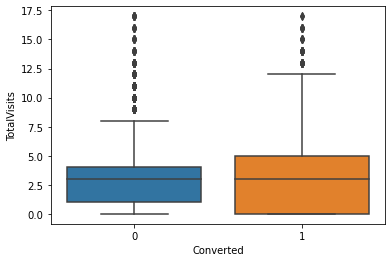

In [70]:
# lets check for Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

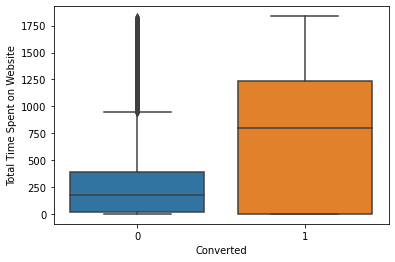

In [71]:
# lets check for Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads_df.Converted, y=leads_df['Total Time Spent on Website'])
plt.show()

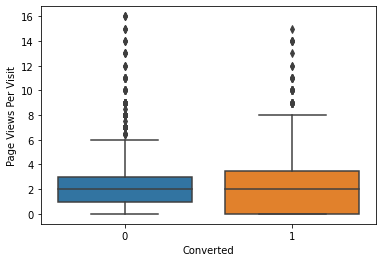

In [72]:
# lets check for Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads_df.Converted,y=leads_df['Page Views Per Visit'])
plt.show()

#### Inference :

- Median of both Converted and Not Converted for 'Page Views Per Visit' & 'TotalVisits are almost same.
- Leads spending more time on the website tend to be converted.

#   Data Preparation for Logistic Regression


### Dummy Creation 

In [74]:
# checking dataframe

leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not known,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not known,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other Methods,Media and Advertising,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not known,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [75]:
# getting name of all the categorical columns

cat_cols = leads_df.select_dtypes(include = 'object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [76]:
#Create dummy variables for all categorical variables

leads_df = pd.get_dummies(data=leads_df,columns=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],drop_first=True)

#Dropping the first columns as (p-1) dummies can explain p categories.

In [77]:
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Not known,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [78]:
#Print columns after creating dummies

leads_df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Do Not Call_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Methods',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_

### Model Building

In [80]:
#Split Data into training and test

# Checking shape before splitting
leads_df.shape

#(8834, 64)

(8901, 64)

In [81]:
#y to contain only target variable (cnt)

y = leads_df.pop('Converted')

In [82]:
#X is constitute of all remaining variable & is also our independent variables

X = leads_df

In [83]:
#Train Test split with 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 100)

In [84]:
# Checking shape and size for train and test

print(X_train.shape) #(6183, 63)
print(X_test.shape)  #(2651, 63)

(6230, 63)
(2671, 63)


### Feature Scaling continuous variables


In [85]:
# Importing required library

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [86]:
# Scaling the Numerical variables
scaler = StandardScaler()

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Tags_Not known,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5920,-0.057159,0.676424,0.336059,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7849,0.961240,0.950035,1.809223,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4485,1.300706,1.536883,0.581586,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1815,0.621773,-0.744465,1.318168,1,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
3804,-1.075557,-0.885988,-1.137105,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


### Build a Model using RFE and Automated approach

In [87]:
# Model 1

# lets first do Model building using statsmodels

# Logistic regression model

lg = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6167
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1297.6
Date:                Mon, 23 Jan 2023   Deviance:                       2595.1
Time:                        00:46:29   Pearson chi2:                 8.17e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.5865      1.663     -3.359      0.001      -8.846      -2.327
TotalVisits                                              0.3094      0.084      3.669      0.000       0.144       0.475
Total Time Spent on Website                              1.2183      0.061     19.812      0.000       1.098       1.339
Page Views Per Visit                                    -0.1906      0.087     -2.185      0.029      -0.361      -0.020
Lead Origin_Landing Page Submission                     -0.6108      0.222     -2.755      0.006      -1.045      -0.176
Lead Origin_Lead Add Form                                0.8707      1.772      0.491      0.623      -2.602       4.343
Lead Origin_Lead Import                                 -0.0147      0.869     -0.017      0.986      -1.718       1.689
Lead Source_Google                                      -0.1510      0.177     -0.852      0.394      -0.498       0.196
Lead Source_Olark Chat                                   1.2888      0.239      5.386      0.000       0.820       1.758
Lead Source_Organic Search                              -0.0993      0.201     -0.495      0.621      -0.493       0.294
Lead Source_Others                                       0.1580      0.451      0.350      0.726      -0.726       1.042
Lead Source_Reference                                    1.2297      1.816      0.677      0.498      -2.330       4.789
Lead Source_Welingak Website                             3.4189      1.919      1.782      0.075      -0.342       7.180
Do Not Email_Yes                                        -1.3889      0.278     -5.001      0.000      -1.933      -0.845
Do Not Call_Yes                                         18.8353   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Bounced                              0.2988      0.583      0.512      0.608      -0.845       1.442
Last Activity_Email Link Clicked                         0.3010      0.458      0.658      0.511      -0.596       1.198
Last Activity_Email Opened                               0.9866      0.342      2.889      0.004       0.317       1.656
Last Activity_Olark Chat Conversation                   -0.8405      0.372     -2.261      0.024      -1.569      -0.112
Last Activity_Other Methods                              0.6831      0.418      1.635      0.102      -0.136       1.502
Last Activity_Page Visited on Website                   -0.2870      0.447     -0.642      0.521      -1.164       0.590
Last Activity_SMS Sent                                   1.4739      0.338      4.363      0.000       0.812       2.136
Specialization_Business Administration                  -0

In [88]:
# Build a Logistic Regression model using SKLearn for RFE

lg1 = LogisticRegression()

rfe = RFE(lg1, step=15)             
rfe = rfe.fit(X_train, y_train)

#Cut down number of features to 15 using automated approach

In [89]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), step=15)

In [90]:
#Columns selected by RFE and their importance

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 3),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Methods', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 2),
 (

In [99]:
# Selected Variables
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Methods',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not known',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Not known', 'Tags_Other Tags',
       'Tags_Ringing', 'Tags_Still T

### Manual elimination

In [91]:
#Print Columns selected by RFE. We will start with these columns for manual elimination

X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Methods',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not known',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Not known', 'Tags_Other Tags',
       'Tags_Ringing', 'Tags_Still T

In [92]:
# Features not selected by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Do Not Call_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not known',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Search_Yes',
       'Newspaper Article_Ye

In [94]:
# Taking 15 columns supported by RFE for regression

X_train_rfe = X_train[['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Methods', 'Last Activity_SMS Sent',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not known',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Through Recommendations_Yes', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Not known', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Still Thinking', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent']]

In [95]:
X_train_rfe.shape # (6230, 31)

(6230, 31)

In [100]:
# Model 2

X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6198
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1309.8
Date:                Mon, 23 Jan 2023   Deviance:                       2619.6
Time:                        00:52:16   Pearson chi2:                 7.76e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0428      0.759     -7.958      0.000      -7.531      -4.554
Total Time Spent on Website                              1.2195      0.060     20.332      0.000       1.102       1.337
Lead Origin_Landing Page Submission                     -0.3616      0.137     -2.641      0.008      -0.630      -0.093
Lead Origin_Lead Add Form                                1.1461      1.663      0.689      0.491      -2.114       4.406
Lead Source_Olark Chat                                   1.2774      0.170      7.536      0.000       0.945       1.610
Lead Source_Reference                                    0.9996      1.712      0.584      0.559      -2.356       4.355
Lead Source_Welingak Website                             3.1080      1.817      1.710      0.087      -0.454       6.670
Do Not Email_Yes                                        -1.3770      0.244     -5.636      0.000      -1.856      -0.898
Last Activity_Email Opened                               0.9204      0.194      4.739      0.000       0.540       1.301
Last Activity_Olark Chat Conversation                   -0.8542      0.266     -3.216      0.001      -1.375      -0.334
Last Activity_Other Methods                              0.6481      0.322      2.015      0.044       0.018       1.279
Last Activity_SMS Sent                                   1.5023      0.245      6.142      0.000       1.023       1.982
Specialization_Hospitality Management                   -0.7657      0.503     -1.524      0.128      -1.751       0.219
Specialization_IT Projects Management                    0.3897      0.288      1.353      0.176      -0.175       0.954
Specialization_International Business                   -0.6450      0.397     -1.626      0.104      -1.423       0.133
Specialization_Supply Chain Management                  -0.4700      0.311     -1.509      0.131      -1.081       0.140
Specialization_Travel and Tourism                       -0.9062      0.355     -2.553      0.011      -1.602      -0.210
What is your current occupation_Housewife               19.4126   1.91e+04      0.001      0.999   -3.74e+04    3.75e+04
What is your current occupation_Not known               -1.9707      0.147    -13.367      0.000      -2.260      -1.682
What is your current occupation_Other                   -1.9095      1.298     -1.471      0.141      -4.453       0.634
What is your current occupation_Working Professional     0.4303      0.323      1.333      0.183      -0.202       1.063
Tags_Closed by Horizzon                                 10.0716      1.254      8.029      0.000       7.613      12.530
Tags_Interested in Next batch                           25

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,52.14
4,Lead Source_Reference,40.78
5,Lead Source_Welingak Website,12.25
23,Tags_Not known,7.59
10,Last Activity_SMS Sent,6.79
30,Last Notable Activity_SMS Sent,5.04
17,What is your current occupation_Not known,4.69
7,Last Activity_Email Opened,3.57
1,Lead Origin_Landing Page Submission,3.49
27,Tags_Will revert after reading the email,3.49


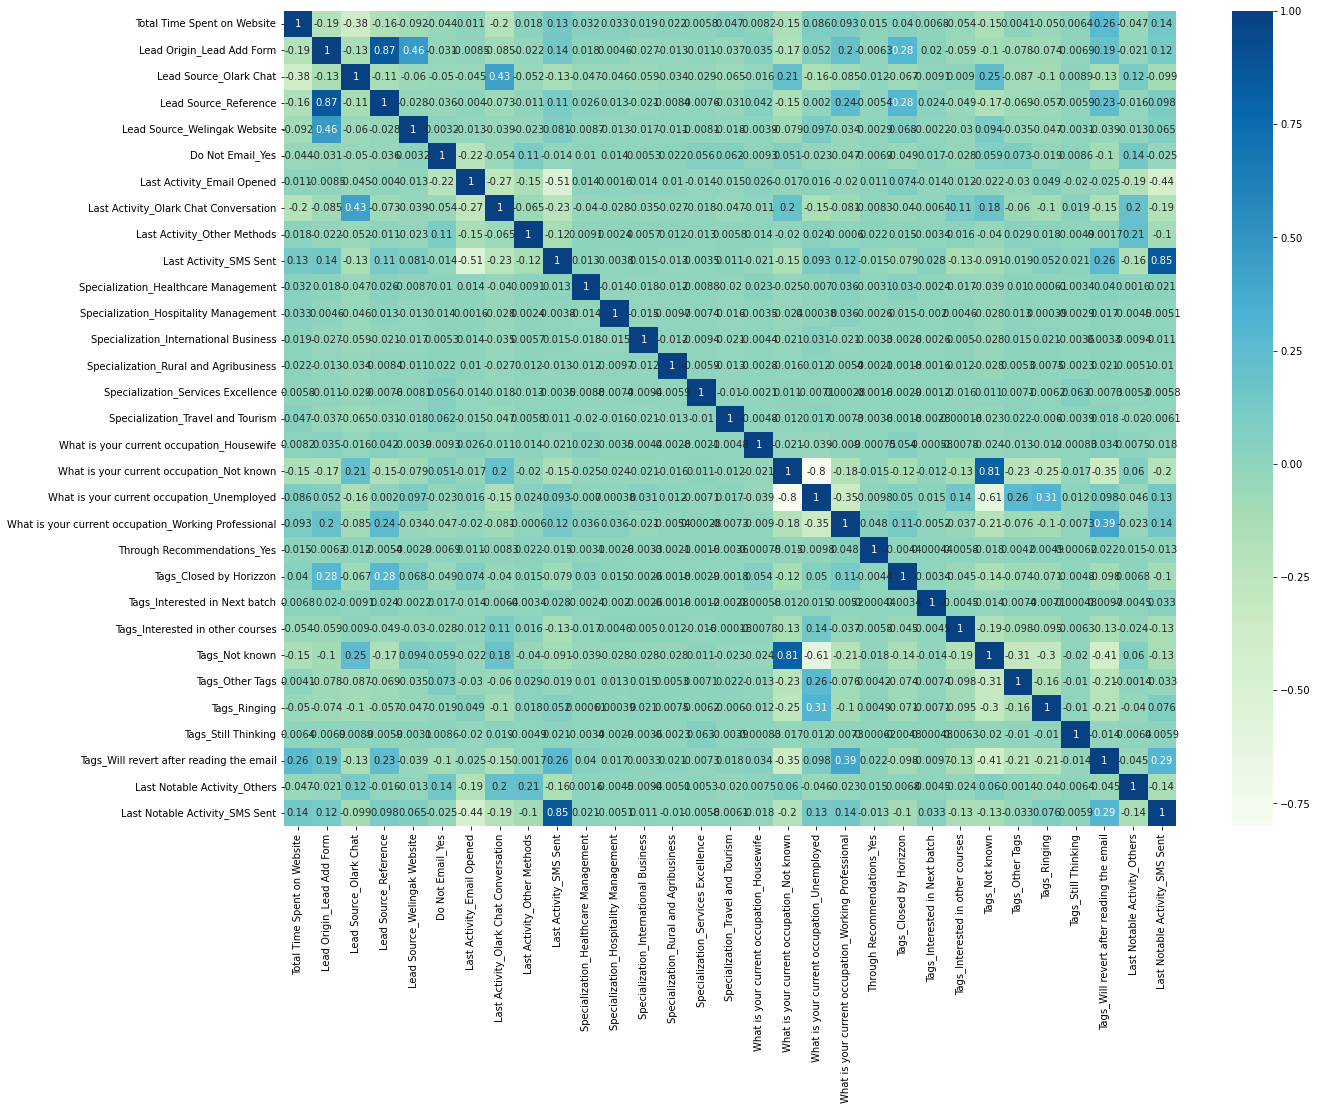

In [112]:
# Checking correlation of features selected by RFE with target column

plt.figure(figsize = (20,15))
sns.heatmap(leads_df[['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Methods', 'Last Activity_SMS Sent',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not known',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Through Recommendations_Yes', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Not known', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Still Thinking', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent']].corr(), cmap='GnBu', annot=True)
plt.show()

In [106]:
# Dropping the variables with very high VIF score ( > 5)

col = col.drop(['Lead Source_Reference','Lead Source_Welingak Website','Lead Origin_Lead Add Form','Tags_Not known','Last Activity_SMS Sent'])
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Methods', 'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not known',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Still Thinking', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Others',
       'Last Notable Activity_Page Visited on Websi

In [107]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])

lg3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = lg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1500.7
Date:                Mon, 23 Jan 2023   Deviance:                       3001.3
Time:                        01:08:16   Pearson chi2:                 7.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5706
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4565      0.156     -2.922      0.003      -0.763      -0.150
Total Time Spent on Website                              1.0649      0.054     19.576      0.000       0.958       1.172
Lead Origin_Landing Page Submission                     -0.9966      0.120     -8.295      0.000      -1.232      -0.761
Lead Source_Olark Chat                                   0.6589      0.146      4.529      0.000       0.374       0.944
Do Not Email_Yes                                        -1.1341      0.210     -5.399      0.000      -1.546      -0.722
Last Activity_Email Opened                               0.1975      0.136      1.448      0.148      -0.070       0.465
Last Activity_Olark Chat Conversation                   -1.6235      0.232     -6.988      0.000      -2.079      -1.168
Last Activity_Other Methods                             -0.0060      0.292     -0.020      0.984      -0.578       0.566
Specialization_Hospitality Management                   -0.5530      0.497     -1.113      0.266      -1.527       0.421
Specialization_IT Projects Management                    0.2251      0.268      0.840      0.401      -0.300       0.750
Specialization_International Business                   -0.5841      0.393     -1.486      0.137      -1.355       0.186
Specialization_Supply Chain Management                  -0.6554      0.286     -2.292      0.022      -1.216      -0.095
Specialization_Travel and Tourism                       -0.9261      0.352     -2.629      0.009      -1.617      -0.236
What is your current occupation_Housewife               19.3848   1.94e+04      0.001      0.999    -3.8e+04     3.8e+04
What is your current occupation_Not known               -1.3298      0.120    -11.037      0.000      -1.566      -1.094
What is your current occupation_Other                   -1.9905      1.142     -1.744      0.081      -4.228       0.247
What is your current occupation_Working Professional     0.5716      0.312      1.834      0.067      -0.039       1.182
Tags_Closed by Horizzon                                  6.3221      1.014      6.234      0.000       4.335       8.310
Tags_Interested in Next batch                           20.5007   3.21e+04      0.001      0.999    -6.3e+04     6.3e+04
Tags_Interested in other courses                        -3.3081      0.427     -7.750      0.000      -4.145      -2.471
Tags_Other Tags                                         -0.6453      0.134     -4.801      0.000      -0.909      -0.382
Tags_Ringing                                            -4.0472      0.248    -16.309      0.000      -4.534      -3.561
Tags_Still Thinking                                    -22

In [108]:
# checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.93
4,Last Activity_Email Opened,2.32
22,Tags_Will revert after reading the email,2.30
13,What is your current occupation_Not known,2.07
25,Last Notable Activity_SMS Sent,2.01
2,Lead Source_Olark Chat,2.00
5,Last Activity_Olark Chat Conversation,1.72
20,Tags_Ringing,1.65
19,Tags_Other Tags,1.51
15,What is your current occupation_Working Profes...,1.32


#### VIF score seems fine for all the variable that is below 5 , lets now drop the variables with high p-value

In [109]:
# Dropping the variables with very high p-value ( > 0.05)

col = col.drop(['Last Notable Activity_Page Visited on Website','Last Notable Activity_Others','Tags_Still Thinking','Tags_Interested in Next batch','What is your current occupation_Working Professional','What is your current occupation_Other','What is your current occupation_Housewife','Specialization_International Business','Specialization_IT Projects Management','Specialization_Hospitality Management','Last Activity_Other Methods','Last Activity_Email Opened'])
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Not known', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [110]:
# Model 4

X_train_sm = sm.add_constant(X_train[col])

lg4 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = lg4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6215
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1511.0
Date:                Mon, 23 Jan 2023   Deviance:                       3022.0
Time:                        01:16:30   Pearson chi2:                 7.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5692
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.3063      0.118     -2.603      0.009      -0.537      -0.076
Total Time Spent on Website                   1.0541      0.054     19.600      0.000       0.949       1.160
Lead Origin_Landing Page Submission          -1.0166      0.118     -8.640      0.000      -1.247      -0.786
Lead Source_Olark Chat                        0.6713      0.145      4.643      0.000       0.388       0.955
Do Not Email_Yes                             -1.1719      0.201     -5.828      0.000      -1.566      -0.778
Last Activity_Olark Chat Conversation        -1.7114      0.208     -8.214      0.000      -2.120      -1.303
Specialization_Supply Chain Management       -0.6492      0.285     -2.279      0.023      -1.207      -0.091
Specialization_Travel and Tourism            -0.9416      0.350     -2.691      0.007      -1.627      -0.256
What is your current occupation_Not known    -1.3410      0.120    -11.206      0.000      -1.576      -1.106
Tags_Closed by Horizzon                       6.4285      1.012      6.351      0.000       4.445       8.413
Tags_Interested in other courses             -3.3230      0.425     -7.811      0.000      -4.157      -2.489
Tags_Other Tags                              -0.6519      0.133     -4.893      0.000      -0.913      -0.391
Tags_Ringing                                 -4.0321      0.247    -16.332      0.000      -4.516      -3.548
Tags_Will revert after reading the email      3.9286      0.200     19.635      0.000       3.536       4.321
Last Notable Activity_SMS Sent                2.2401      0.117     19.205      0.000       2.012       2.469
=============================================================================================================
"""

In [111]:
# checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.65
2,Lead Source_Olark Chat,1.85
7,What is your current occupation_Not known,1.77
12,Tags_Will revert after reading the email,1.68
13,Last Notable Activity_SMS Sent,1.48
4,Last Activity_Olark Chat Conversation,1.46
11,Tags_Ringing,1.44
10,Tags_Other Tags,1.38
0,Total Time Spent on Website,1.28
3,Do Not Email_Yes,1.12


#### Insights
-  p-value for all the features is < 0.05 
-  VIF for all the features is < 5 , are in acceptable range & very low multicollinearity among the predictors

So, this model seems good & all the statistics are within required parameters, lets move to creating predictions

# Model Evaluation

### Creating Prediction


In [113]:
# Predictions on the train set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.72675453, 0.99264951, 0.99844671, ..., 0.02604818, 0.34638945,
       0.98087216])

In [114]:
# Creating the DataFrame with Actual Converted and Predicted Probabilities

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.726755,5920
1,1,0.992650,7849
2,1,0.998447,4485
3,0,0.009751,1815
4,0,0.026048,3804


In [115]:
# lets create a new column 'Predicted' with values which have Probability greater than 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.726755,5920,1
1,1,0.992650,7849,1
2,1,0.998447,4485,1
3,0,0.009751,1815,0
4,0,0.026048,3804,0


In [116]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))

0.9024077046548956


#### Accuracy - 0.90

In [117]:
# Let's take a look at the confusion matrix 

confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)

confusion

array([[3685,  184],
       [ 424, 1937]], dtype=int64)

In [ ]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3685            184
    # Converted            424            1937 

### Measuring Model Performance


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8204150783566285

#### Sensitivity - 0.82

Sensitivity (Recall) tells us what percentage of leads that were converted, were correctly identified as converted.


In [120]:
# Let us calculate specificity

TN / float(TN+FP)

0.9524424915998966

#### Specificity - 0.95

Specificity tells is what percentage of leads that were NOT converted were correctly identified.

In [121]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

# 0.047557508400103386

0.047557508400103386


In [122]:
# Positive predictive value 

print (TP / float(TP+FP))

# 0.9132484677039132

0.9132484677039132


In [123]:
# Negative predictive value

print (TN / float(TN+ FN))

#0.8968118763689462

0.8968118763689462


In [124]:
# Precision Score

precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9132484677039132

#### Precision - 0.91


In [125]:
# Recall Score

recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8204150783566285

#### Recall - 0.82

### ROC Curve


In [126]:
# plotting ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False)

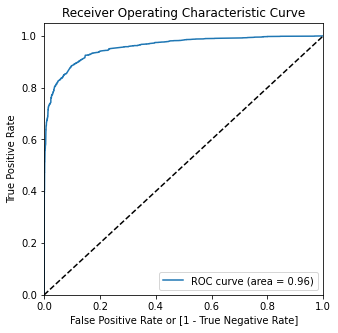

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cut-off Points


In [129]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.726755,5920,1,1,1,1,1,1,1,1,1,0,0
1,1,0.992650,7849,1,1,1,1,1,1,1,1,1,1,1
2,1,0.998447,4485,1,1,1,1,1,1,1,1,1,1,1
3,0,0.009751,1815,0,1,0,0,0,0,0,0,0,0,0
4,0,0.026048,3804,0,1,0,0,0,0,0,0,0,0,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.378973     1.000000     0.000000
0.1   0.1  0.779615     0.962728     0.667873
0.2   0.2  0.871268     0.928420     0.836392
0.3   0.3  0.891974     0.891571     0.892220
0.4   0.4  0.899037     0.847099     0.930731
0.5   0.5  0.902408     0.820415     0.952442
0.6   0.6  0.899037     0.789496     0.965883
0.7   0.7  0.895185     0.765777     0.974154
0.8   0.8  0.886838     0.726387     0.984751
0.9   0.9  0.863884     0.652266     0.993021


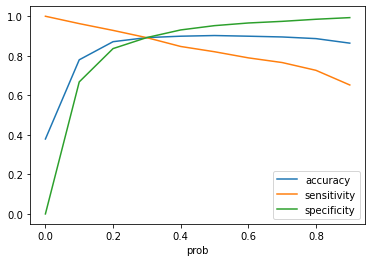

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

plt.show()

#### As we can observe that 0.3 is the optimal point.

In [132]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.726755,5920,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.992650,7849,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.998447,4485,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.009751,1815,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.026048,3804,0,1,0,0,0,0,0,0,0,0,0,0


In [133]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))

# 0.8919743178170144

0.8919743178170144


In [134]:
# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion

array([[3452,  417],
       [ 256, 2105]], dtype=int64)

In [ ]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3452          417
    # Converted            256           2105

In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# sensitivity

TP / float(TP+FN)  # 0.8915713680643795

0.8915713680643795

In [137]:
# specificity

TN / float(TN+FP)  # 0.89222021194107

0.89222021194107

In [138]:
# Precision Score

precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

# 0.8346550356859636

0.8346550356859636

In [139]:
# Recall Score

recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

# 0.8915713680643795

0.8915713680643795

In [140]:
# Precision and Recall Tradeoff

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

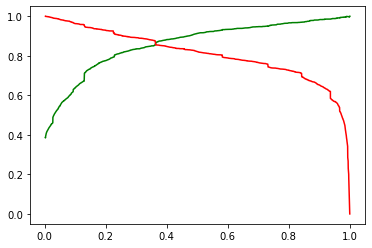

In [141]:
# lets plot precision & recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the Test Set

In [142]:
# Scaling the Numerical Variables

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [143]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Not known,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3009,-0.136861,1,0,0,0,0,0,1,0,0,0,0,0,0
7955,-0.885988,0,1,0,1,0,0,1,0,0,0,0,0,0
4044,-0.885988,0,1,0,0,0,0,0,0,0,0,0,1,1
4559,0.763225,1,0,0,0,0,0,0,0,0,0,0,1,1
5227,-0.885988,0,1,0,0,0,0,1,0,0,0,0,0,0


In [144]:
X_test_sm = sm.add_constant(X_test)

In [145]:
# Predictions on test set

y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

3009    0.056879
7955    0.026048
4044    0.996315
4559    0.996496
5227    0.128980
dtype: float64

In [146]:
# Converting y_pred to a DataFrame

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3009,0.056879
7955,0.026048
4044,0.996315
4559,0.996496
5227,0.128980


In [147]:
# Converting y_test to DataFrame

y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting 'Prospect ID' to index


y_test_df['Prospect ID'] = y_test_df.index

In [149]:
# Removing index for both DataFrames to concatenate them side by side


y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [150]:
# Concatenating y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3009,0.056879
1,0,7955,0.026048
2,1,4044,0.996315
3,1,4559,0.996496
4,0,5227,0.128980


In [151]:
# lets rename the column

y_pred_final = y_pred_final.rename(columns = {0: 'Converted_Prob'})

In [ ]:
# lets rearrange the columns

y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_final.head()

In [152]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,Final_Predicted
0,0,3009,0.056879,0
1,0,7955,0.026048,0
2,1,4044,0.996315,1
3,1,4559,0.996496,1
4,0,5227,0.128980,0


In [153]:
# Overall Accuracy

metrics.accuracy_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

# 0.871209284912018

0.871209284912018

In [154]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)
confusion2

array([[1453,  240],
       [ 104,  874]], dtype=int64)

In [155]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [156]:
# sensitivity

TP / float(TP+FN) # 0.8936605316973415

0.8936605316973415

In [157]:
# specificity

TN / float(TN+FP)  # 0.8582398109864147

0.8582398109864147

In [158]:
# Calculate false postive rate 

print(FP/ float(TN+FP))  # 0.14176018901358536

0.14176018901358536


In [159]:
# Positive predictive value 

print (TP / float(TP+FP))  # 0.7845601436265709

0.7845601436265709


In [160]:
# Negative predictive value

print (TN / float(TN+ FN))  # 0.9332048811817598

0.9332048811817598


### Conclusions

#### Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 87.12%

Sensitivity : 89.36%

Specificity : 85.82%

In [ ]:
#### Final Observation:
Let us compare the values obtained for Train & Test:

Train Data:-
    
Accuracy : 89.19%
    
Sensitivity : 89.15%
    
Specificity : 89.22%
    
Test Data:-
    
Accuracy : 87.12%

Sensitivity : 89.36%

Specificity : 85.82%


#### As  we can observe that, we have achieved  an overall accuracy of about 0.87 on our Logistic Regression model. That is, there is 87% chance that our predicted leads will be converted. This meets the CEO's target of atleast 80% lead conversion.

In [ ]:
####Significant variables to predict the lead conversion are : -
    
    - Tags_Closed by Horizzon
    - Tags_Ringing
    - Tags_Will revert after reading the email
    - Tags_Interested in other courses
    - Last Notable Activity_SMS Sent
    - Total Time Spent on Website
    - Last Activity_Olark Chat Conversation	
    - Lead Origin_Landing Page Submission
    